In [1]:
import json
import pandas as pd
from pandas.core.common import flatten
import seaborn as sns
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
presidenciaveis_raw = pd.read_json("../data/presidenciaveis.json")

In [3]:
data = []
for subdata in presidenciaveis_raw.loc['data'].values:
    data = [*data, *subdata]

tmp_df = pd.DataFrame(data)
tmp_public_metrics_df = pd.DataFrame.from_records(tmp_df['public_metrics'])

df = tmp_df.drop(columns="public_metrics")
df[tmp_public_metrics_df.columns] = tmp_public_metrics_df

In [4]:
df['created_at']  = pd.to_datetime(df['created_at'])

In [5]:
user_id = presidenciaveis_raw.loc['id']

map_user_id = defaultdict(lambda x: "N/A", {key:value for value, key in user_id.items()})

In [6]:
df['author'] = df['author_id'].apply(lambda x: map_user_id[x])

In [7]:
df['author'].unique()

array(['jairbolsonaro', 'cirogomes', 'LulaOficial', 'jdoriajr',
       'LucianoHuck', 'MarinaSilva', 'GuilhermeBoulos'], dtype=object)

In [8]:
df

,author_id,created_at,id,text,retweet_count,reply_count,like_count,quote_count,author
0,128372940,2021-03-31 23:56:08+00:00,1377409408267812865,- Em abril/2013 o Congresso anulou a sessão de...,5847,3413,32214,414,jairbolsonaro
1,128372940,2021-03-31 21:18:11+00:00,1377369657598877697,- Apresento os novos comandantes de Força:\n\n...,6655,4362,37607,604,jairbolsonaro
2,128372940,2021-03-31 16:10:25+00:00,1377292204792807436,https://t.co/F2v9HVOYW1,778,483,4104,21,jairbolsonaro
3,128372940,2021-03-31 12:58:37+00:00,1377243939237953539,"1.2- Assim, os aproximadamente 2.900 profissio...",1187,348,7005,13,jairbolsonaro
4,128372940,2021-03-31 12:57:49+00:00,1377243735994601472,1.1- Reforçando o combate ao Covid19 na atençã...,1039,218,4980,23,jairbolsonaro
...,...,...,...,...,...,...,...,...,...
472,762402774260875265,2021-03-02 00:03:57+00:00,1366539737650122753,Dinheiro da rachadinha. Esculhambação completa...,695,190,6482,54,GuilhermeBoulos
473,762402774260875265,2021-03-01 22:40:06+00:00,1366518638367358978,RT @SeverinoSoutoA1: Estamos em reunião com as...,33,0,0,0,GuilhermeBoulos
474,762402774260875265,2021-03-01 17:02:59+00:00,1366433799916118018,Número de UTIs com financiamento federal no pa...,965,49,4791,29,GuilhermeBoulos
475,762402774260875265,2021-03-01 16:49:41+00:00,1366430450760224772,96% dos moradores de 239 favelas usaram o dinh...,1103,141,10330,37,GuilhermeBoulos


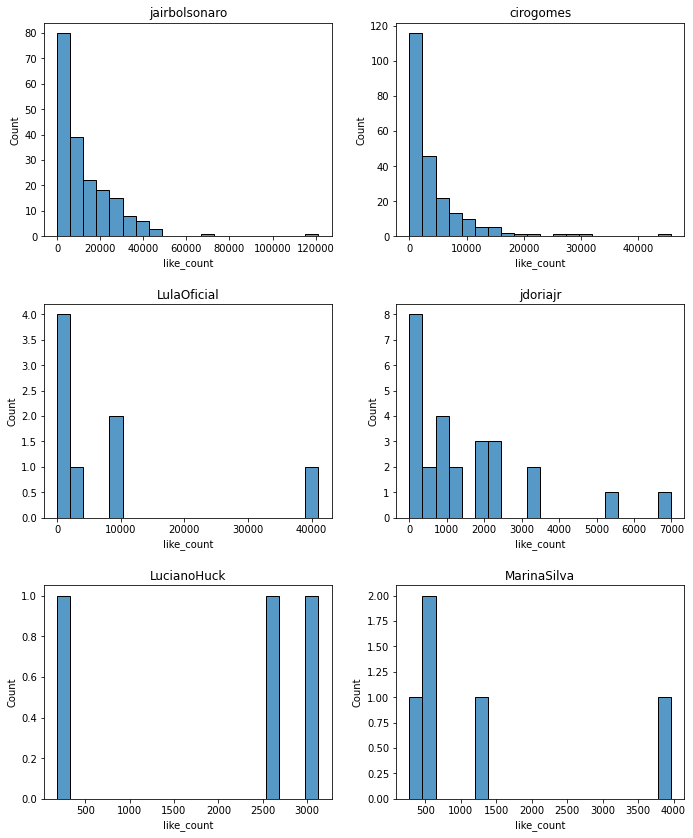

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,12))
ax = ax.flatten()

for i, unique_author in enumerate(df.author.unique()[:-1]):
    tmp_df = df.loc[df['author'] == unique_author]
    sns.histplot(ax=ax[i], data=tmp_df, x='like_count', bins=20)
    ax[i].set(title=unique_author)

fig.tight_layout(pad = 2)

In [12]:
tmp_df

,author_id,created_at,id,text,retweet_count,reply_count,like_count,quote_count,author
0,128372940,2021-03-31 23:56:08+00:00,1377409408267812865,- Em abril/2013 o Congresso anulou a sessão de...,5847,3413,32214,414,jairbolsonaro
1,128372940,2021-03-31 21:18:11+00:00,1377369657598877697,- Apresento os novos comandantes de Força:\n\n...,6655,4362,37607,604,jairbolsonaro
2,128372940,2021-03-31 16:10:25+00:00,1377292204792807436,https://t.co/F2v9HVOYW1,778,483,4104,21,jairbolsonaro
3,128372940,2021-03-31 12:58:37+00:00,1377243939237953539,"1.2- Assim, os aproximadamente 2.900 profissio...",1187,348,7005,13,jairbolsonaro
4,128372940,2021-03-31 12:57:49+00:00,1377243735994601472,1.1- Reforçando o combate ao Covid19 na atençã...,1039,218,4980,23,jairbolsonaro
...,...,...,...,...,...,...,...,...,...
188,128372940,2021-03-03 18:19:35+00:00,1367177851255021574,RT @AmendoncaMJSP: O governo @jairbolsonaro is...,1676,0,0,0,jairbolsonaro
189,128372940,2021-03-02 20:25:48+00:00,1366847225800912896,"- Em 12/março/2012 às 12h20, Jair Bolsonaro fo...",6220,4410,26669,420,jairbolsonaro
190,128372940,2021-03-02 11:11:26+00:00,1366707716899627011,- ÓLEO DIESEL e GÁS DE COZINHA.\n- Imposto fed...,6362,4378,28426,545,jairbolsonaro
191,128372940,2021-03-01 08:31:22+00:00,1366305045768200194,- 30/março/2020 e\n- 10/fevereiro/2021.\n- Bom...,9296,10215,45205,3093,jairbolsonaro


In [13]:
import plotly.express as px
tmp_df = df.loc[df['author'] == 'jairbolsonaro']
fig = px.box(tmp_df, y="like_count", points="all", hover_data=["text"])
px.box()
fig.show()
# sns.histplot(ax=ax[i], data=tmp_df, x='like_count', bins=20)

In [11]:
tmp_df

,author_id,created_at,id,text,retweet_count,reply_count,like_count,quote_count,author
0,128372940,2021-03-31 23:56:08+00:00,1377409408267812865,- Em abril/2013 o Congresso anulou a sessão de...,5847,3413,32214,414,jairbolsonaro
1,128372940,2021-03-31 21:18:11+00:00,1377369657598877697,- Apresento os novos comandantes de Força:\n\n...,6655,4362,37607,604,jairbolsonaro
2,128372940,2021-03-31 16:10:25+00:00,1377292204792807436,https://t.co/F2v9HVOYW1,778,483,4104,21,jairbolsonaro
3,128372940,2021-03-31 12:58:37+00:00,1377243939237953539,"1.2- Assim, os aproximadamente 2.900 profissio...",1187,348,7005,13,jairbolsonaro
4,128372940,2021-03-31 12:57:49+00:00,1377243735994601472,1.1- Reforçando o combate ao Covid19 na atençã...,1039,218,4980,23,jairbolsonaro
...,...,...,...,...,...,...,...,...,...
188,128372940,2021-03-03 18:19:35+00:00,1367177851255021574,RT @AmendoncaMJSP: O governo @jairbolsonaro is...,1676,0,0,0,jairbolsonaro
189,128372940,2021-03-02 20:25:48+00:00,1366847225800912896,"- Em 12/março/2012 às 12h20, Jair Bolsonaro fo...",6220,4410,26669,420,jairbolsonaro
190,128372940,2021-03-02 11:11:26+00:00,1366707716899627011,- ÓLEO DIESEL e GÁS DE COZINHA.\n- Imposto fed...,6362,4378,28426,545,jairbolsonaro
191,128372940,2021-03-01 08:31:22+00:00,1366305045768200194,- 30/março/2020 e\n- 10/fevereiro/2021.\n- Bom...,9296,10215,45205,3093,jairbolsonaro
